# SRT statistics vs Tshark data analysis

In [123]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
# import plotly.graph_objects as go
import seaborn as sns

from tcpdump_processing import convert, extract_packets

Set filepaths to the source files: sender and receiver SRT core `.csv` statistics, tshark `.pcapng` dumps collected on both sides

In [124]:
STATS_SND = '_data/_useast_eunorth_10.02.20_15Mbps/msharabayko@23.96.93.54/4-srt-xtransmit-stats-snd.csv'
STATS_RCV = '_data/_useast_eunorth_10.02.20_15Mbps/msharabayko@40.69.89.21/3-srt-xtransmit-stats-rcv.csv'
RCV_TSHARK_PCAPNG = '_data/_useast_eunorth_10.02.20_15Mbps/msharabayko@40.69.89.21/2-tshark-tracefile.pcapng'

## Functions

In [125]:
# def plot_scatter(
#     title,
#     x_metric,
#     y_metrics,
#     x_axis_title,
#     y_axis_title,
#     df_aggregated
# ):
#     """
#     Function to plot and format a scatterplot from the aggregated dataframe
#     """
#     data = []
#     shapes = list()
#     for y_metric in y_metrics:
#         data.append(
#             go.Scatter(
#                 x=df_aggregated.index,
#                 y=df_aggregated[y_metric],
#                 mode='lines',
#                 marker=dict(opacity=0.8, line=dict(width=0)),
#                 name=y_metric
#             )
#         )

#     fig = go.Figure(data=data)
#     fig.update_layout(
#         title=title,
#         xaxis_title=x_axis_title,
#         yaxis_title=y_axis_title,
#         legend=go.layout.Legend(
#             x=0,
#             y=1,
#             traceorder="normal",
#             font=dict(family="sans-serif", size=8, color="black"),
#             bgcolor="LightSteelBlue",
#             bordercolor="Black",
#             borderwidth=2
#         ),
#         shapes=shapes
#     )
# #     fig.show()
#     plt.show()
    
    
def plot_heatmap(df):
    corr = df.corr()
#     print(corr)
    sns.heatmap(corr, cmap='coolwarm')
    plt.show()
    
    
# Without Ethernet packet overhead, bytes
SRT_DATA_PACKET_HEADER_SIZE = 44
SRT_DATA_PACKET_PAYLOAD_SIZE = 1456


def convert_pktsps_in_bytesps(value):
    return value * (SRT_DATA_PACKET_HEADER_SIZE + SRT_DATA_PACKET_PAYLOAD_SIZE)


def convert_bytesps_in_mbps(value):
    return value * 8 / 1000000

## SRT statistics analysis

Set the list of SRT statistics features to analyze

In [126]:
SND_FEATURES = [
    'pktFlowWindow',
    'pktCongestionWindow',
    'pktFlightSize',
    'msRTT',
    'mbpsBandwidth',
    'pktSent',
    'pktSndLoss',
    'pktSndDrop',
    'pktRetrans',
    'byteSent',
    'byteSndDrop',
    'mbpsSendRate',
    'usPktSndPeriod',
]

RCV_FEATURES = [
    'msRTT',
    'mbpsBandwidth',
    'pktRecv',
    'pktRcvLoss',
    'pktRcvDrop',
    'pktRcvRetrans',
    'pktRcvBelated',
    'byteRecv',
    'byteRcvLoss',
    'byteRcvDrop',
    'mbpsRecvRate',
]

Load SRT statistics from sender and receiver sides to dataframes `snd_stats` and `rcv_stats` respectively, make timezone conversion

In [127]:
snd_stats = pd.read_csv(STATS_SND, index_col='Timepoint', parse_dates=True)
rcv_stats = pd.read_csv(STATS_RCV, index_col='Timepoint', parse_dates=True)

snd_stats = snd_stats[SND_FEATURES]
rcv_stats = rcv_stats[RCV_FEATURES]

snd_stats.index = snd_stats.index.tz_convert(None)
rcv_stats.index = rcv_stats.index.tz_convert(None)

In [ ]:
# TODO: Drop first observation

### Sender SRT statistics

In [128]:
snd_stats.head(30)

,pktFlowWindow,pktCongestionWindow,pktFlightSize,msRTT,mbpsBandwidth,pktSent,pktSndLoss,pktSndDrop,pktRetrans,byteSent,byteSndDrop,mbpsSendRate,usPktSndPeriod
Timepoint,,,,,,,,,,,,,
2020-10-02 14:49:16.930599,25600,25600,0,100.000,12.000,0,0,0,0,0,0,0.0000,10
2020-10-02 14:49:16.940779,25600,25600,14,100.000,12.000,14,0,0,0,19040,0,14.9480,10
2020-10-02 14:49:16.950907,25600,25600,29,100.000,12.000,15,0,0,0,20400,0,16.1122,10
2020-10-02 14:49:16.961034,25600,25600,43,100.000,12.000,14,0,0,0,19040,0,15.0395,10
2020-10-02 14:49:16.971169,25600,25600,58,100.000,12.000,15,0,0,0,20400,0,16.1058,10
2020-10-02 14:49:16.981299,25600,25600,72,100.000,12.000,14,0,0,0,19040,0,15.0336,10
2020-10-02 14:49:16.991419,25600,25600,86,100.000,12.000,14,0,0,0,19040,0,15.0514,10
2020-10-02 14:49:17.001547,25598,25600,100,100.000,1.500,15,0,0,0,20400,0,16.1137,10
2020-10-02 14:49:17.011666,25583,25600,99,100.000,2.808,14,0,0,0,19040,0,15.0529,10


In [129]:
snd_stats.describe()

,pktFlowWindow,pktCongestionWindow,pktFlightSize,msRTT,mbpsBandwidth,pktSent,pktSndLoss,pktSndDrop,pktRetrans,byteSent,byteSndDrop,mbpsSendRate,usPktSndPeriod
count,2965.000000,2965.0,2965.000000,2965.000000,2965.000000,2965.000000,2965.0,2965.0,2965.0,2965.000000,2965.0,2965.000000,2965.0
mean,25427.145700,25600.0,100.150759,65.598068,15.073307,14.433052,0.0,0.0,0.0,19628.951096,0.0,15.514959,10.0
std,10.729798,0.0,5.393291,3.054441,0.970238,0.627195,0.0,0.0,0.0,852.985793,0.0,0.683392,0.0
min,25415.000000,25600.0,0.000000,65.184000,1.500000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,10.0
25%,25425.000000,25600.0,97.000000,65.216000,14.952000,14.000000,0.0,0.0,0.0,19040.000000,0.0,15.058800,10.0
50%,25427.000000,25600.0,100.000000,65.231000,15.300000,14.000000,0.0,0.0,0.0,19040.000000,0.0,15.079700,10.0
75%,25427.000000,25600.0,104.000000,65.272000,15.504000,15.000000,0.0,0.0,0.0,20400.000000,0.0,16.131300,10.0
max,25600.000000,25600.0,117.000000,100.000000,15.888000,20.000000,0.0,0.0,0.0,27200.000000,0.0,21.398400,10.0


TODO: Integrate bokeh plots + plotly
https://docs.bokeh.org/en/latest/docs/user_guide/notebook.html
https://plot.ly/python/renderers/

In [130]:
# plot_scatter(
#     'SENDER Time series',
#     'Timepoint',
#     snd_stats.columns,
#     'Time',
#     'SENDER',
#     snd_stats
# )

Correlation on levels:

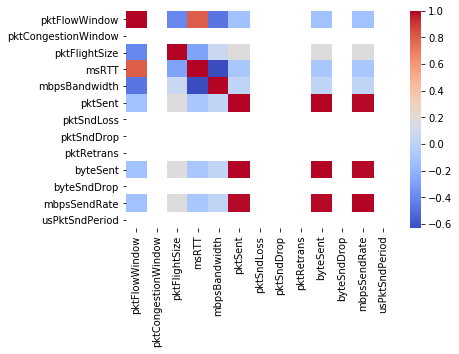

In [131]:
plot_heatmap(snd_stats)

TODO: Correlation on returns:

In [132]:
# snd_stats_returns = snd_stats.pct_change()
# snd_stats_returns.head(10)
# plot_heatmap(snd_stats_returns)

### Receiver SRT statistics

In [133]:
rcv_stats.head(30)

,msRTT,mbpsBandwidth,pktRecv,pktRcvLoss,pktRcvDrop,pktRcvRetrans,pktRcvBelated,byteRecv,byteRcvLoss,byteRcvDrop,mbpsRecvRate
Timepoint,,,,,,,,,,,
2020-10-02 14:49:16.891016,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.901202,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.911323,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.921452,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.931581,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.941710,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.951868,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.962031,100.000,12.000,0,0,0,0,0,0,0,0,0.0000
2020-10-02 14:49:16.972177,100.000,12.036,12,0,0,0,0,16320,0,0,12.8681


In [134]:
rcv_stats.describe()

,msRTT,mbpsBandwidth,pktRecv,pktRcvLoss,pktRcvDrop,pktRcvRetrans,pktRcvBelated,byteRecv,byteRcvLoss,byteRcvDrop,mbpsRecvRate
count,2969.000000,2969.000000,2969.000000,2969.0,2969.0,2969.0,2969.0,2969.000000,2969.0,2969.0,2969.000000
mean,65.510474,15.154028,14.411586,0.0,0.0,0.0,0.0,19599.757494,0.0,0.0,15.481565
std,2.647265,0.797894,1.158736,0.0,0.0,0.0,0.0,1575.880859,0.0,0.0,1.258461
min,65.177000,10.680000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,65.216000,14.988000,14.000000,0.0,0.0,0.0,0.0,19040.000000,0.0,0.0,15.064800
50%,65.230000,15.360000,14.000000,0.0,0.0,0.0,0.0,19040.000000,0.0,0.0,15.094600
75%,65.264000,15.564000,15.000000,0.0,0.0,0.0,0.0,20400.000000,0.0,0.0,16.136000
max,100.000000,16.212000,27.000000,0.0,0.0,0.0,0.0,36720.000000,0.0,0.0,28.999000


TODO: Plot

Correlation on levels:

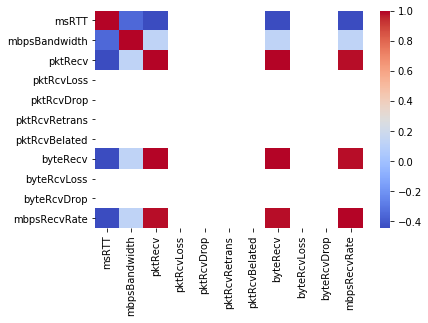

In [135]:
plot_heatmap(rcv_stats)

### Combine sender and receiver time series

Combine sender and receiver data sets with statistics using linear interpolation.
TODO: Experiment with different interpolation methods for different features.

In [136]:
stats = snd_stats.join(rcv_stats, how='outer', lsuffix='_snd', rsuffix='_rcv')
stats = stats.interpolate()
stats = stats.dropna()
stats.head(10)

,pktFlowWindow,pktCongestionWindow,pktFlightSize,msRTT_snd,mbpsBandwidth_snd,pktSent,pktSndLoss,pktSndDrop,pktRetrans,byteSent,...,mbpsBandwidth_rcv,pktRecv,pktRcvLoss,pktRcvDrop,pktRcvRetrans,pktRcvBelated,byteRecv,byteRcvLoss,byteRcvDrop,mbpsRecvRate
Timepoint,,,,,,,,,,,,,,,,,,,,,
2020-10-02 14:49:16.930599,25600.0,25600.0,0.0,100.0,12.0,0.0,0.0,0.0,0.0,0.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.931581,25600.0,25600.0,7.0,100.0,12.0,7.0,0.0,0.0,0.0,9520.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.940779,25600.0,25600.0,14.0,100.0,12.0,14.0,0.0,0.0,0.0,19040.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.941710,25600.0,25600.0,21.5,100.0,12.0,14.5,0.0,0.0,0.0,19720.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.950907,25600.0,25600.0,29.0,100.0,12.0,15.0,0.0,0.0,0.0,20400.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.951868,25600.0,25600.0,36.0,100.0,12.0,14.5,0.0,0.0,0.0,19720.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.961034,25600.0,25600.0,43.0,100.0,12.0,14.0,0.0,0.0,0.0,19040.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.962031,25600.0,25600.0,50.5,100.0,12.0,14.5,0.0,0.0,0.0,19720.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.971169,25600.0,25600.0,58.0,100.0,12.0,15.0,0.0,0.0,0.0,20400.0,...,12.018,6.0,0.0,0.0,0.0,0.0,8160.0,0.0,0.0,6.43405


Correlation on levels:

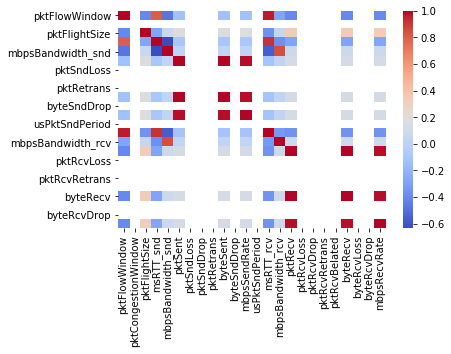

In [137]:
plot_heatmap(stats)

## SRT statistics vs Thark dump

Extract SRT packets from `.pcapng` tshark dump file:

In [138]:
# RCV_TSHARK_CSV = convert.convert_to_csv(pathlib.Path(RCV_TSHARK_PCAPNG), True)
RCV_TSHARK_CSV = convert.convert_to_csv(pathlib.Path(RCV_TSHARK_PCAPNG))
rcv_srt_packets = extract_packets.extract_srt_packets(RCV_TSHARK_CSV)
rcv_srt_packets.head(10)

Skipping .pcapng to .csv tcpdump trace file processing, .csv file already exists: _data/_useast_eunorth_10.02.20_15Mbps/msharabayko@40.69.89.21/2-tshark-tracefile.pcapng.


,ws.no,frame.time,ws.time,ws.source,ws.destination,ws.protocol,ws.length,ws.info,udp.length,srt.iscontrol,srt.type,srt.seqno,srt.msg.rexmit,srt.timestamp,srt.id,srt.ack_seqno,srt.rate,srt.bw,srt.rcvrate,data.len
0,1,2020-02-10 15:49:16.822072+01:00,0.000000,23.96.93.54,10.0.0.5,SRT,106,Control: UMSG_HANDSHAKE socket: 0x0,72,1,0x00000000,NaN,NaN,134,0x00000000,NaN,NaN,NaN,NaN,0
1,2,2020-02-10 15:49:16.822331+01:00,0.000259,10.0.0.5,23.96.93.54,SRT,106,Control: UMSG_HANDSHAKE socket: 0x38db38e6,72,1,0x00000000,NaN,NaN,13485219,0x38db38e6,NaN,NaN,NaN,NaN,0
2,3,2020-02-10 15:49:16.888305+01:00,0.066233,23.96.93.54,10.0.0.5,SRT,122,Control: UMSG_HANDSHAKE socket: 0x0,88,1,0x00000000,NaN,NaN,66688,0x00000000,NaN,NaN,NaN,NaN,0
3,4,2020-02-10 15:49:16.889593+01:00,0.067521,10.0.0.5,23.96.93.54,SRT,122,Control: UMSG_HANDSHAKE socket: 0x38db38e6,88,1,0x00000000,NaN,NaN,0,0x38db38e6,NaN,NaN,NaN,NaN,0
4,5,2020-02-10 15:49:16.964210+01:00,0.142139,23.96.93.54,10.0.0.5,SRT,1374,DATA: seqno: 617119614 msgno: 1 socket: 0x2c...,1340,0,NaN,617119614.0,0.0,142595,0x2c62b659,NaN,NaN,NaN,NaN,1316
5,6,2020-02-10 15:49:16.964375+01:00,0.142304,10.0.0.5,23.96.93.54,SRT,86,Control: UMSG_ACK 1 ackseq: 617119615 socket:...,52,1,0x00000002,NaN,NaN,75921,0x38db38e6,617119615.0,1.0,1000.0,1500.0,0
6,7,2020-02-10 15:49:16.964807+01:00,0.142735,23.96.93.54,10.0.0.5,SRT,1374,DATA: seqno: 617119615 msgno: 2 socket: 0x2c...,1340,0,NaN,617119615.0,0.0,143287,0x2c62b659,NaN,NaN,NaN,NaN,1316
7,8,2020-02-10 15:49:16.965453+01:00,0.143381,23.96.93.54,10.0.0.5,SRT,1374,DATA: seqno: 617119616 msgno: 3 socket: 0x2c...,1340,0,NaN,617119616.0,0.0,143987,0x2c62b659,NaN,NaN,NaN,NaN,1316
8,9,2020-02-10 15:49:16.966218+01:00,0.144146,23.96.93.54,10.0.0.5,SRT,1374,DATA: seqno: 617119617 msgno: 4 socket: 0x2c...,1340,0,NaN,617119617.0,0.0,144689,0x2c62b659,NaN,NaN,NaN,NaN,1316
9,10,2020-02-10 15:49:16.966880+01:00,0.144808,23.96.93.54,10.0.0.5,SRT,1374,DATA: seqno: 617119618 msgno: 5 socket: 0x2c...,1340,0,NaN,617119618.0,0.0,145416,0x2c62b659,NaN,NaN,NaN,NaN,1316


Extract UMSG_ACK packets from SRT packets `rcv_srt_packets` which contains receiving speed and bandwidth estimations reported by receiver each 10 ms:

In [139]:
rcv_umsg_ack_packets = extract_packets.extract_umsg_ack_packets(rcv_srt_packets)
rcv_umsg_ack_packets.head()

,ws.no,frame.time,ws.time,ws.source,ws.destination,ws.protocol,ws.length,ws.info,srt.iscontrol,srt.type,srt.timestamp,srt.id,srt.ack_seqno,srt.rate,srt.bw,srt.rcvrate
5,6,2020-02-10 15:49:16.964375+01:00,0.142304,10.0.0.5,23.96.93.54,SRT,86,Control: UMSG_ACK 1 ackseq: 617119615 socket:...,1,0x00000002,75921,0x38db38e6,617119615,1,1000,1500
21,22,2020-02-10 15:49:16.974695+01:00,0.152624,10.0.0.5,23.96.93.54,SRT,86,Control: UMSG_ACK 2 ackseq: 617119630 socket:...,1,0x00000002,86247,0x38db38e6,617119630,1456,1003,1976936
37,38,2020-02-10 15:49:16.985151+01:00,0.163080,10.0.0.5,23.96.93.54,SRT,86,Control: UMSG_ACK 3 ackseq: 617119645 socket:...,1,0x00000002,96701,0x38db38e6,617119645,1435,1006,1950695
53,54,2020-02-10 15:49:16.995630+01:00,0.173559,10.0.0.5,23.96.93.54,SRT,86,Control: UMSG_ACK 4 ackseq: 617119660 socket:...,1,0x00000002,107194,0x38db38e6,617119660,1431,1018,1943725
69,70,2020-02-10 15:49:17.006189+01:00,0.184117,10.0.0.5,23.96.93.54,SRT,86,Control: UMSG_ACK 5 ackseq: 617119675 socket:...,1,0x00000002,117748,0x38db38e6,617119675,1425,1021,1934739


From `rcv_umsg_ack_packets` dataframe, extract features valuable for further analysis, do some data cleaning and timezone correction

In [140]:
TSHARK_FEATURES = ['ws.no', 'frame.time', 'srt.rate', 'srt.bw', 'srt.rcvrate']
rcv_umsg_ack_packets = rcv_umsg_ack_packets[TSHARK_FEATURES]
rcv_umsg_ack_packets = rcv_umsg_ack_packets.set_index('frame.time')
rcv_umsg_ack_packets.index = rcv_umsg_ack_packets.index.tz_convert(None)
rcv_umsg_ack_packets = rcv_umsg_ack_packets.rename(columns={"srt.rate": "srt.rate.pkts", "srt.bw": "srt.bw.pkts", "srt.rcvrate": "srt.rate.Bps"})
rcv_umsg_ack_packets['srt.rate.Mbps'] = convert_bytesps_in_mbps(rcv_umsg_ack_packets['srt.rate.Bps'])
rcv_umsg_ack_packets['srt.bw.Mbps'] = convert_bytesps_in_mbps(convert_pktsps_in_bytesps(rcv_umsg_ack_packets['srt.bw.pkts']))
rcv_umsg_ack_packets = rcv_umsg_ack_packets[['ws.no', 'srt.rate.pkts', 'srt.rate.Mbps', 'srt.bw.pkts', 'srt.bw.Mbps']]
rcv_umsg_ack_packets.head(10)

,ws.no,srt.rate.pkts,srt.rate.Mbps,srt.bw.pkts,srt.bw.Mbps
frame.time,,,,,
2020-02-10 14:49:16.964375,6,1,0.012000,1000,12.000
2020-02-10 14:49:16.974695,22,1456,15.815488,1003,12.036
2020-02-10 14:49:16.985151,38,1435,15.605560,1006,12.072
2020-02-10 14:49:16.995630,54,1431,15.549800,1018,12.216
2020-02-10 14:49:17.006189,70,1425,15.477912,1021,12.252
2020-02-10 14:49:17.016691,86,1435,15.597176,1024,12.288
2020-02-10 14:49:17.027243,102,1425,15.494440,1028,12.336
2020-02-10 14:49:17.037727,119,1427,15.515152,1032,12.384
2020-02-10 14:49:17.048274,136,1425,15.480664,1035,12.420


TODO: Before joining check that the time zone in both data sets is the same

In [141]:
stats.head(20)

,pktFlowWindow,pktCongestionWindow,pktFlightSize,msRTT_snd,mbpsBandwidth_snd,pktSent,pktSndLoss,pktSndDrop,pktRetrans,byteSent,...,mbpsBandwidth_rcv,pktRecv,pktRcvLoss,pktRcvDrop,pktRcvRetrans,pktRcvBelated,byteRecv,byteRcvLoss,byteRcvDrop,mbpsRecvRate
Timepoint,,,,,,,,,,,,,,,,,,,,,
2020-10-02 14:49:16.930599,25600.0,25600.0,0.0,100.0,12.000,0.0,0.0,0.0,0.0,0.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.931581,25600.0,25600.0,7.0,100.0,12.000,7.0,0.0,0.0,0.0,9520.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.940779,25600.0,25600.0,14.0,100.0,12.000,14.0,0.0,0.0,0.0,19040.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.941710,25600.0,25600.0,21.5,100.0,12.000,14.5,0.0,0.0,0.0,19720.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.950907,25600.0,25600.0,29.0,100.0,12.000,15.0,0.0,0.0,0.0,20400.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.951868,25600.0,25600.0,36.0,100.0,12.000,14.5,0.0,0.0,0.0,19720.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.961034,25600.0,25600.0,43.0,100.0,12.000,14.0,0.0,0.0,0.0,19040.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.962031,25600.0,25600.0,50.5,100.0,12.000,14.5,0.0,0.0,0.0,19720.0,...,12.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2020-10-02 14:49:16.971169,25600.0,25600.0,58.0,100.0,12.000,15.0,0.0,0.0,0.0,20400.0,...,12.018,6.0,0.0,0.0,0.0,0.0,8160.0,0.0,0.0,6.43405


In [142]:
rcv_stats_tshark = rcv_stats.join(rcv_umsg_ack_packets, how='outer', lsuffix='_stats', rsuffix='_tshark')
# rcv_stats_tshark = rcv_stats_tshark.interpolate()
# rcv_stats_tshark = rcv_stats_tshark.dropna()
rcv_stats_tshark.head(10)

# stats = snd_stats.join(rcv_stats, how='outer', lsuffix='_snd', rsuffix='_rcv')
# stats = stats.interpolate()
# stats = stats.dropna()
# stats.head(10)

,msRTT,mbpsBandwidth,pktRecv,pktRcvLoss,pktRcvDrop,pktRcvRetrans,pktRcvBelated,byteRecv,byteRcvLoss,byteRcvDrop,mbpsRecvRate,ws.no,srt.rate.pkts,srt.rate.Mbps,srt.bw.pkts,srt.bw.Mbps
2020-02-10 14:49:16.964375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,0.012000,1000.0,12.000
2020-02-10 14:49:16.974695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1456.0,15.815488,1003.0,12.036
2020-02-10 14:49:16.985151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,1435.0,15.605560,1006.0,12.072
2020-02-10 14:49:16.995630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,1431.0,15.549800,1018.0,12.216
2020-02-10 14:49:17.006189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1425.0,15.477912,1021.0,12.252
2020-02-10 14:49:17.016691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,1435.0,15.597176,1024.0,12.288
2020-02-10 14:49:17.027243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,1425.0,15.494440,1028.0,12.336
2020-02-10 14:49:17.037727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,1427.0,15.515152,1032.0,12.384
2020-02-10 14:49:17.048274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,1425.0,15.480664,1035.0,12.420
2020-02-10 14:49:17.058730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,1429.0,15.540088,1039.0,12.468
